# Understanding XGBoost Internals

In this notebook, we’ll dive into how **XGBoost** improves upon traditional Gradient Boosting Machines (GBMs).  
XGBoost stands for **eXtreme Gradient Boosting**, developed by Tianqi Chen, and is designed for speed and performance.

We'll cover:
- Core differences from standard GBM
- Regularization in the objective function
- Tree growth and split finding
- Parallel computation
- A simple example to illustrate its power


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import xgboost as xgb

## Core Differences Between GBM and XGBoost

| Concept | Gradient Boosting | XGBoost |
|----------|-------------------|----------|
| Regularization | Usually none | L1 (Lasso) + L2 (Ridge) |
| Split Finding | Exact greedy algorithm | Histogram-based + parallel |
| Missing Values | Often imputed | Handled natively |
| Objective | Least squares / log loss | Add regularization term |
| Tree Growth | Level-wise | Depth-wise (default) or leaf-wise |
| Speed | Slower | Much faster via parallelization |


In [2]:
# Load dataset
X, y = load_diabetes(return_X_y=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create DMatrix (XGBoost's optimized data structure)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [3]:
params = {
    "objective": "reg:squarederror",  # regression objective
    "max_depth": 3,                   # tree depth
    "eta": 0.1,                       # learning rate
    "lambda": 1,                      # L2 regularization
    "alpha": 0,                       # L1 regularization
    "verbosity": 1
}

# Train using the low-level XGBoost API
model = xgb.train(params, dtrain, num_boost_round=100)

In [4]:
# Predict and round for readability
y_pred = model.predict(dtest)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"RMSE: {rmse:.2f}")

RMSE: 54.40


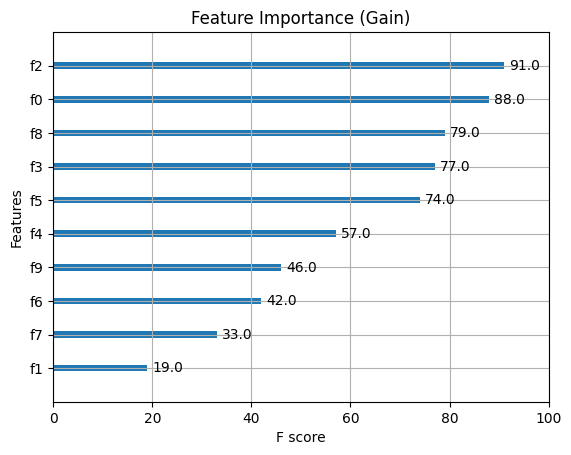

In [5]:
# Feature importance shows how much each variable contributes to reducing prediction error
xgb.plot_importance(model)
plt.title("Feature Importance (Gain)")
plt.show()

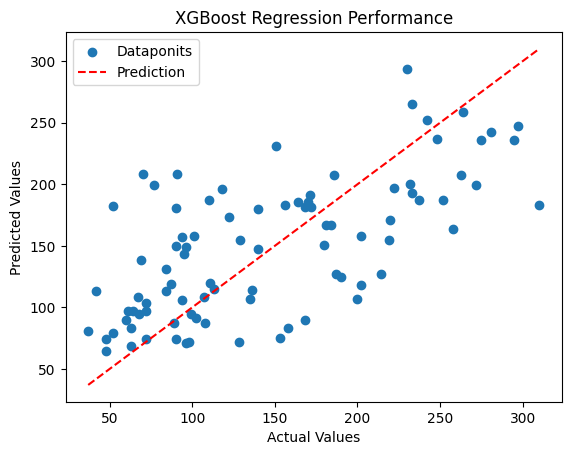

In [6]:
plt.scatter(y_test, y_pred, label = 'Dataponits')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Prediction')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("XGBoost Regression Performance")
plt.legend()
plt.show()

### Takeaways
- XGBoost builds trees using an optimized, parallel approach.
- Regularization prevents overfitting.
- It’s much faster and usually more accurate than traditional GBM.